In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


# Read the CSV file into a DataFrame
file_path = 'preprocessed_weather_data.csv'  # Replace with the actual path to your CSV file
weather_data = pd.read_csv(file_path)

# Display basic statistics of the dataset
print(weather_data.describe())

          MinTemp     MaxTemp    Rainfall  Evaporation    Sunshine  \
count  366.000000  366.000000  366.000000   366.000000  366.000000   
mean     7.265574   20.550273    0.102799     1.586795    2.049159   
std      6.025800    6.690516    0.170253     0.505872    0.625452   
min     -5.300000    7.600000    0.000000     0.182322    0.000000   
25%      2.300000   15.025000    0.000000     1.163151    1.935119   
50%      7.450000   19.650000    0.000000     1.648659    2.261763   
75%     12.500000   25.500000    0.182322     2.001480    2.442347   
max     20.900000   35.800000    0.405465     2.617396    2.681022   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count     366.000000    366.000000    366.000000   366.000000   366.000000   
mean       39.531421      2.049004      2.821725     4.273897     3.746877   
std        12.208563      0.803888      0.517751     0.189373     0.384382   
min        13.000000      0.000000      0.000000     3.67

In [3]:
correlation_matrix = weather_data.corr()

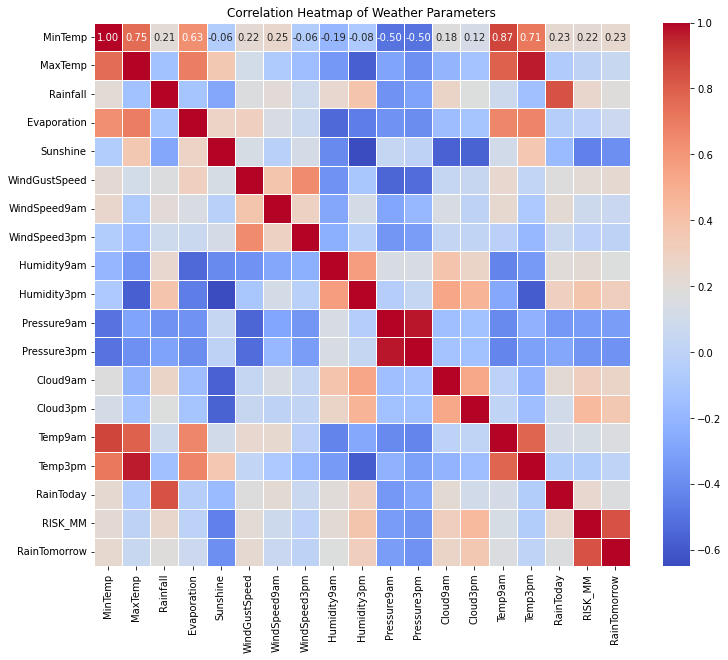

In [5]:
# Calculate the correlation matrix
correlation_matrix = weather_data.corr()

# Plot a heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of Weather Parameters")
plt.show()

C:\Users\ghanc\AppData\Roaming\Python\Python310\site-packages\seaborn\matrix.py:256: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


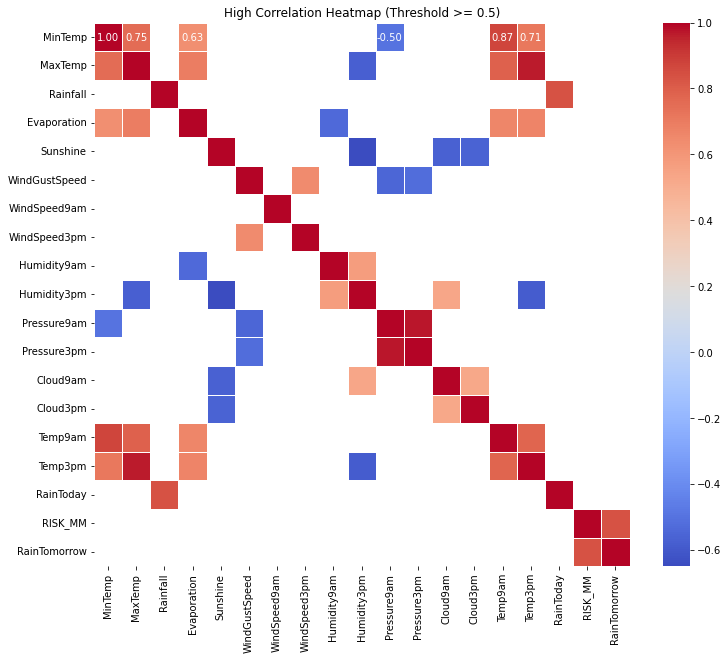

In [7]:
# Set a threshold to filter out correlations below a certain value
threshold = 0.5
high_correlation = correlation_matrix[abs(correlation_matrix) >= threshold]

# Plot a heatmap for the high correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(high_correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("High Correlation Heatmap (Threshold >= 0.5)")
plt.show()

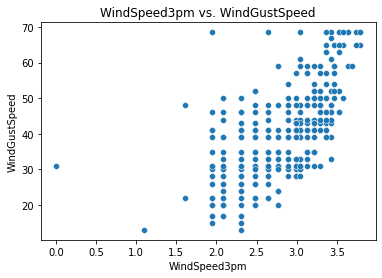

In [10]:
# Investigate the relationship between wind speed and gust speed
sns.scatterplot(x='WindSpeed3pm', y='WindGustSpeed', data=weather_data)
plt.title("WindSpeed3pm vs. WindGustSpeed")
plt.show()

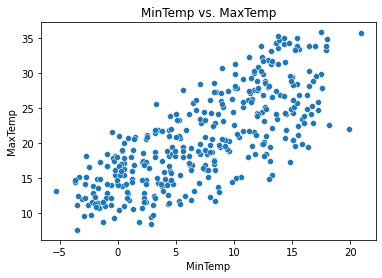

In [11]:
sns.scatterplot(x='MinTemp', y='MaxTemp', data=weather_data)
plt.title("MinTemp vs. MaxTemp")
plt.show()

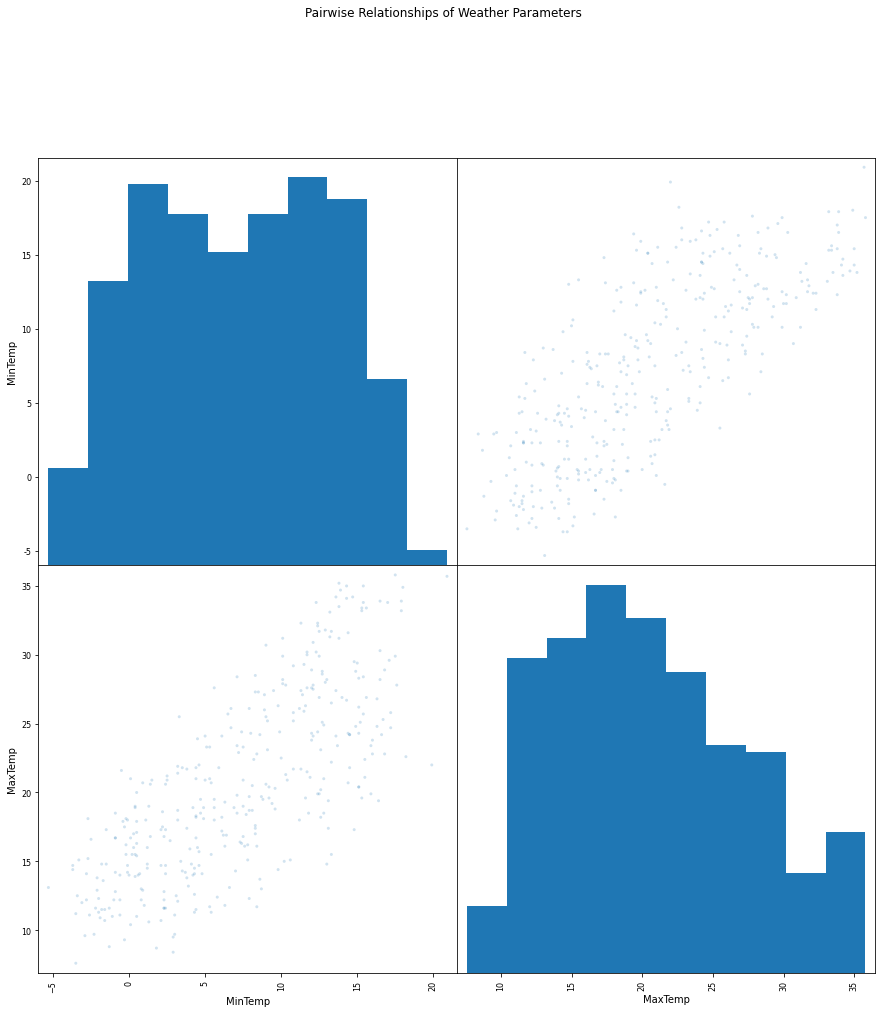

In [4]:
# Plot scatter plots for pairs of variables
selected_columns = ['MinTemp', 'MaxTemp']
# Create scatter matrix
scatter_matrix(weather_data[selected_columns], alpha=0.2, figsize=(15, 15), diagonal='hist')

plt.suptitle("Pairwise Relationships of Weather Parameters", y=1.02)
plt.show()

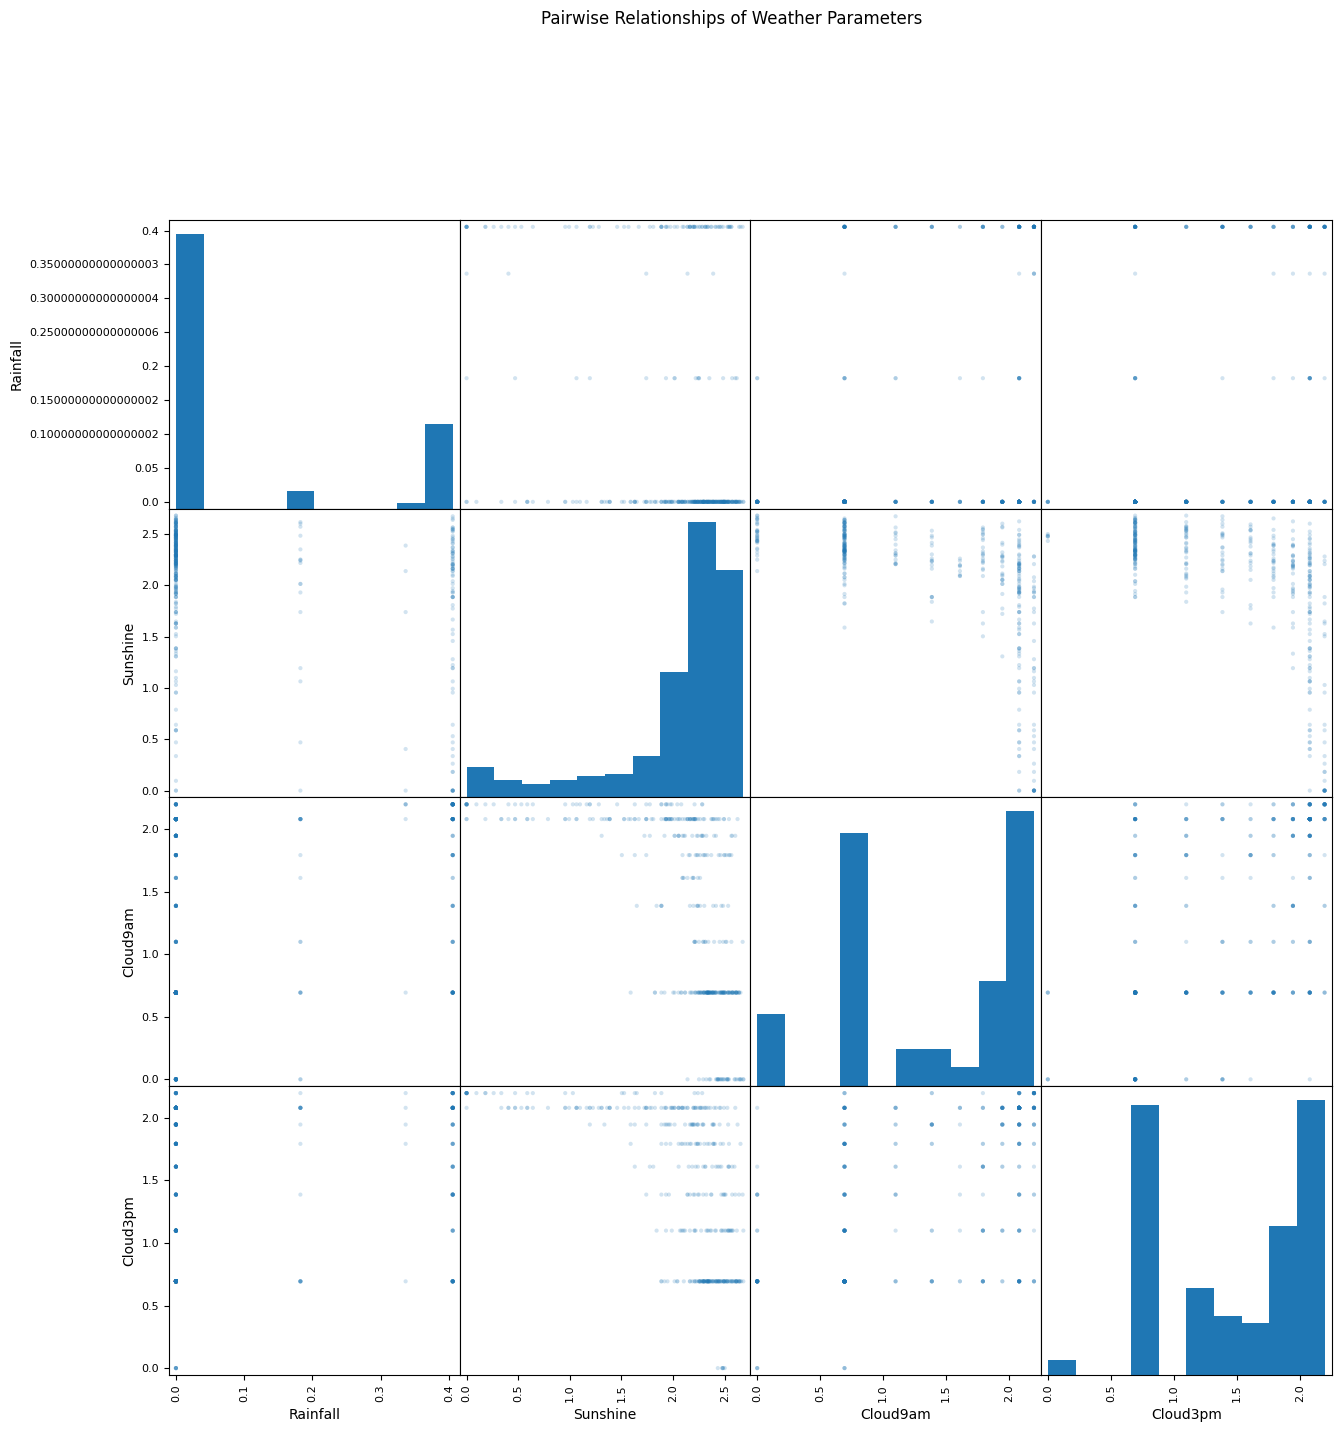

In [12]:
selected_columns = ['Rainfall', 'Sunshine', 
                    'Cloud9am', 'Cloud3pm',]

# Create scatter matrix
scatter_matrix(weather_data[selected_columns], alpha=0.2, figsize=(15, 15), diagonal='hist')

plt.suptitle("Pairwise Relationships of Weather Parameters", y=1.02)
plt.show()

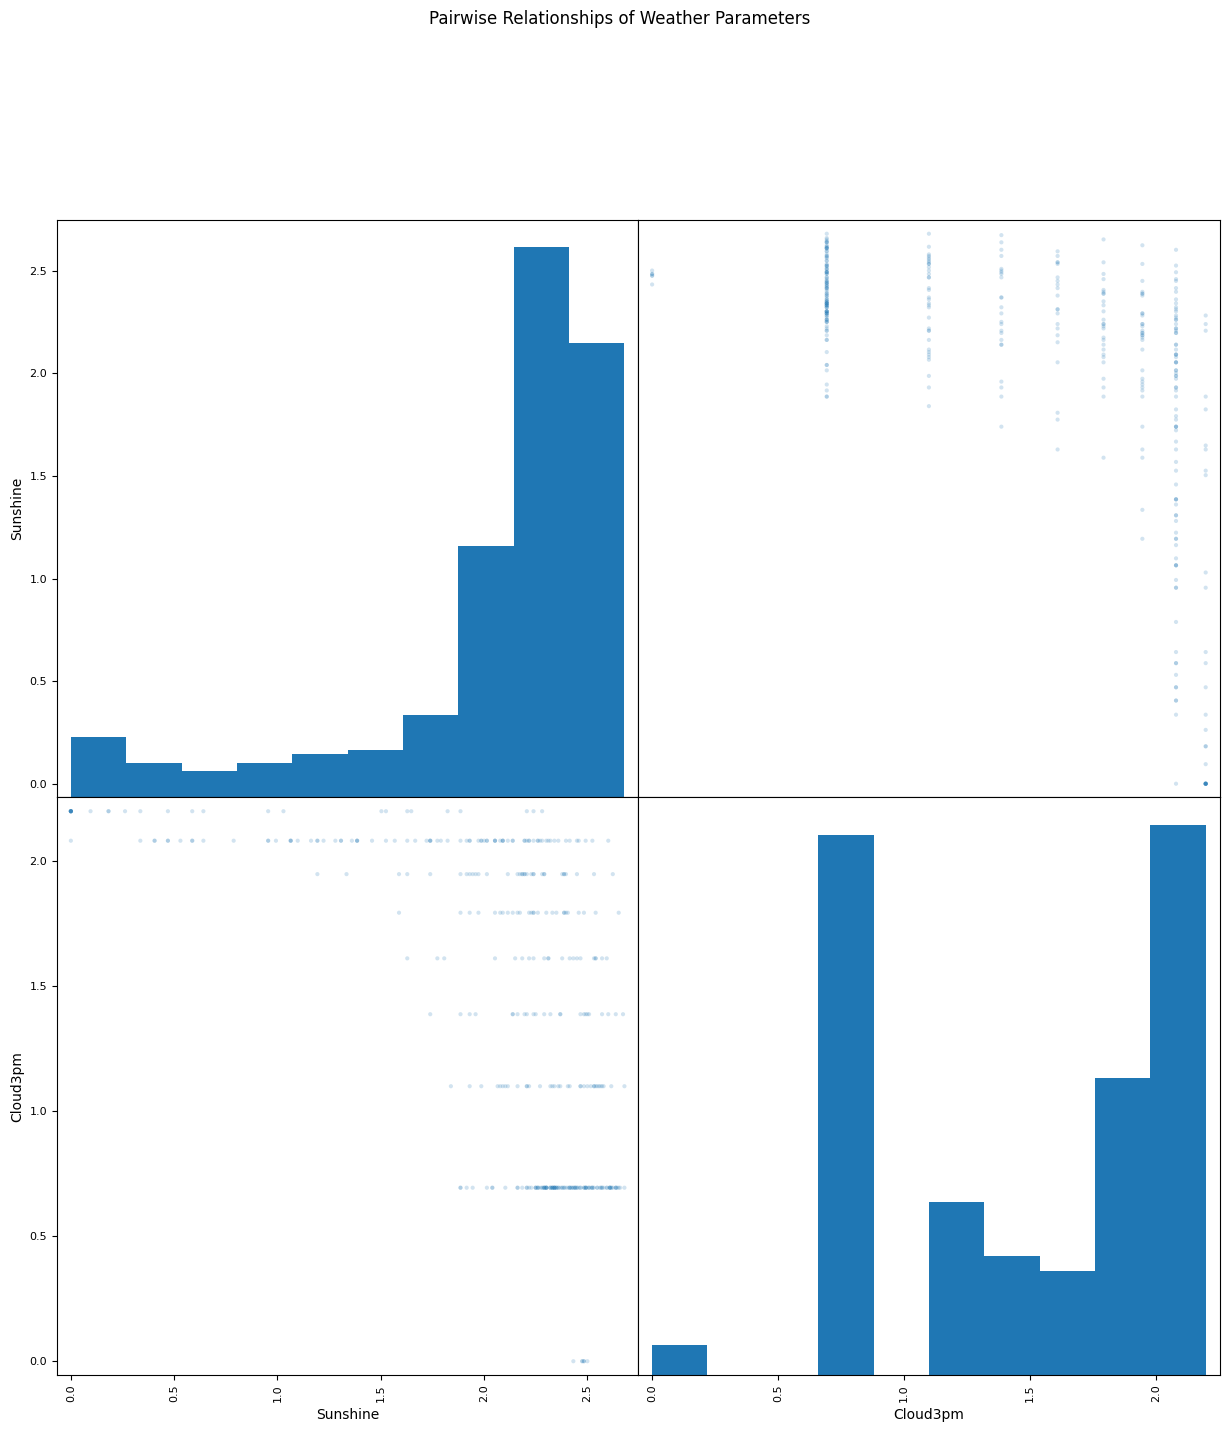

In [13]:
selected_columns = [ 'Sunshine',
                     'Cloud3pm']

# Create scatter matrix
scatter_matrix(weather_data[selected_columns], alpha=0.2, figsize=(15, 15), diagonal='hist')

plt.suptitle("Pairwise Relationships of Weather Parameters", y=1.02)
plt.show()

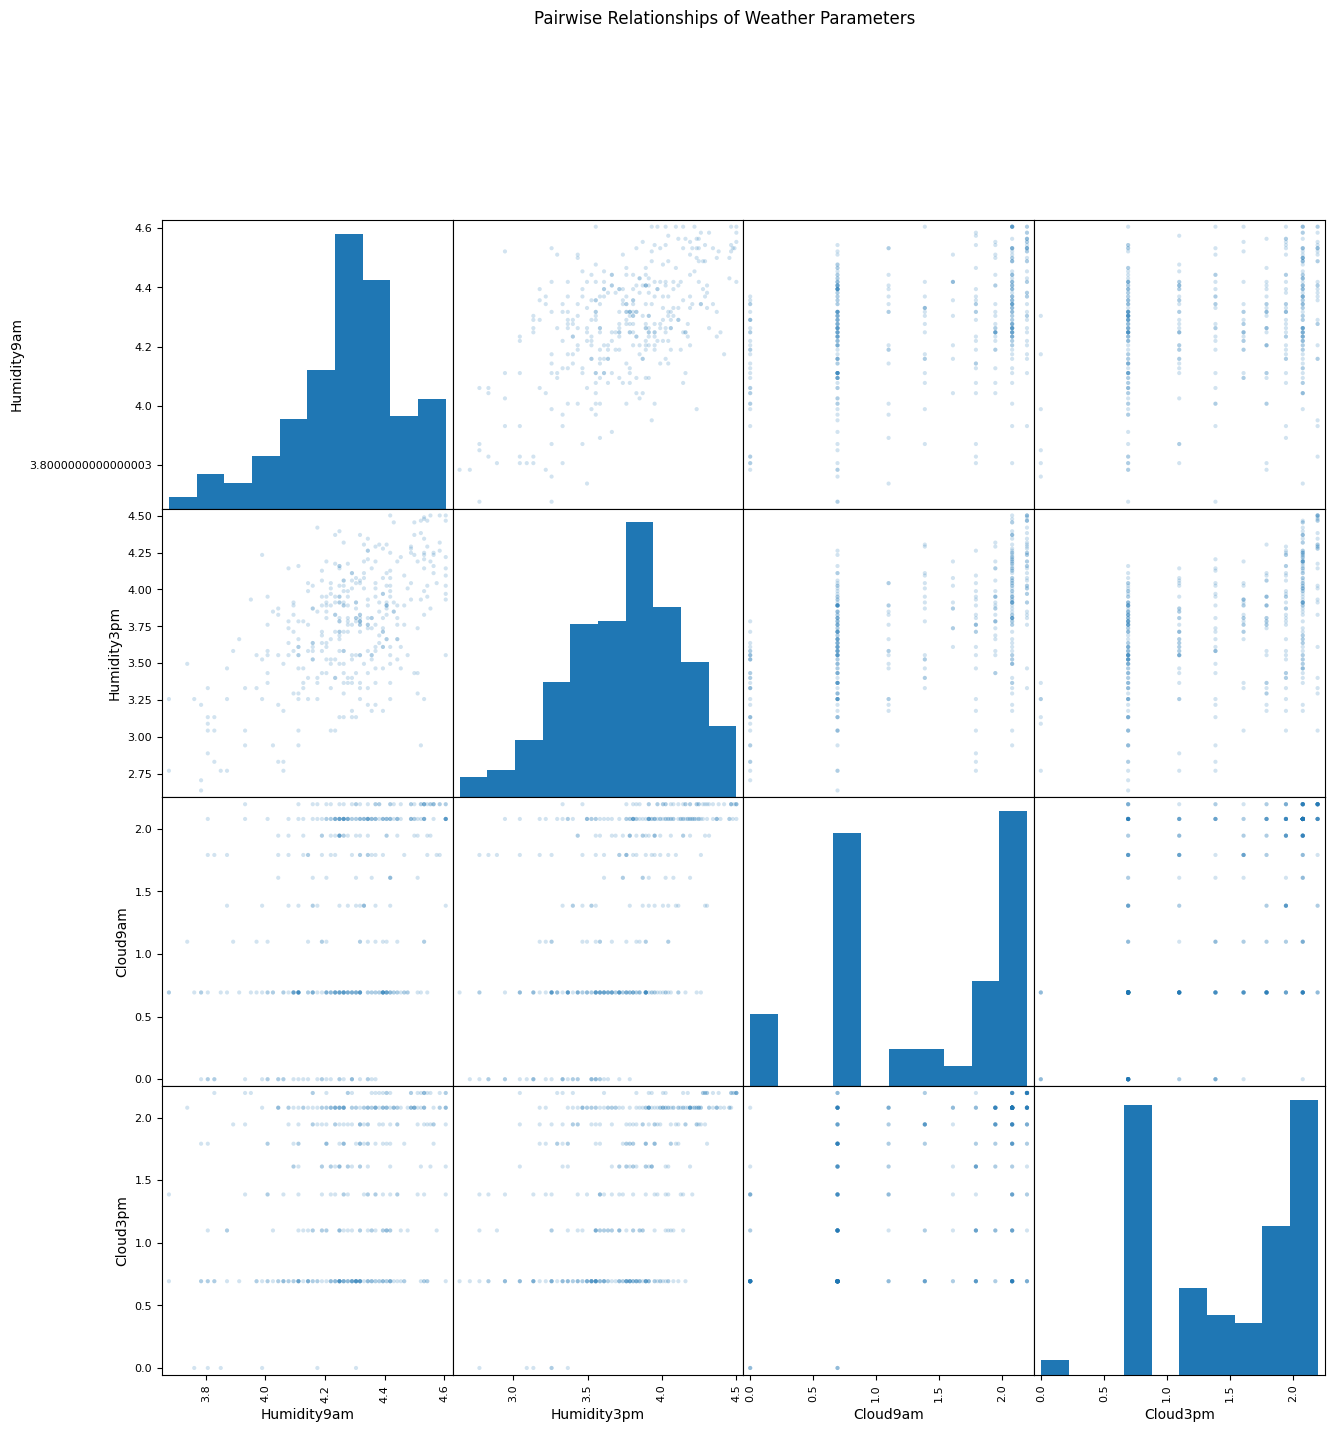

In [14]:
selected_columns = ['Humidity9am', 'Humidity3pm',
                    'Cloud9am', 'Cloud3pm']

# Create scatter matrix
scatter_matrix(weather_data[selected_columns], alpha=0.2, figsize=(15, 15), diagonal='hist')

plt.suptitle("Pairwise Relationships of Weather Parameters", y=1.02)
plt.show()

Mean Squared Error: 16.050633649439888


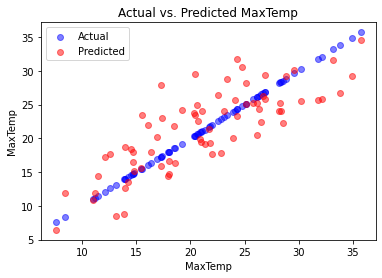

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


features = ['MinTemp', 'Rainfall', 'WindGustSpeed', 'Humidity9am', 'Pressure9am']

# Select the dependent variable (target)
target = 'MaxTemp'

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(weather_data[features], weather_data[target], test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the actual vs. predicted values
plt.scatter(y_test, y_test, c='blue', label='Actual', alpha=0.5)
plt.scatter(y_test, y_pred, c='red', label='Predicted', alpha=0.5)
plt.xlabel("MaxTemp")
plt.ylabel("MaxTemp")
plt.title("Actual vs. Predicted MaxTemp")
plt.legend()
plt.show()



Mean Squared Error: 0.07539943038377955


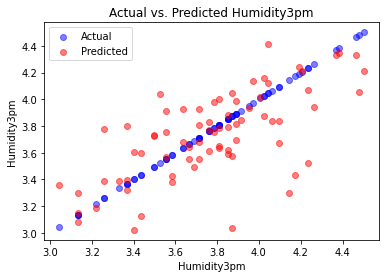

In [17]:
features = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'Pressure3pm']

# Select the dependent variable (target)
target = 'Humidity3pm'

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(weather_data[features], weather_data[target], test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the actual vs. predicted values with different colors
plt.scatter(y_test, y_test, c='blue', label='Actual', alpha=0.5)
plt.scatter(y_test, y_pred, c='red', label='Predicted', alpha=0.5)
plt.xlabel("Humidity3pm")
plt.ylabel("Humidity3pm")
plt.title("Actual vs. Predicted Humidity3pm")
plt.legend()
plt.show()

Mean Squared Error for Rainfall: 0.02499686169004889


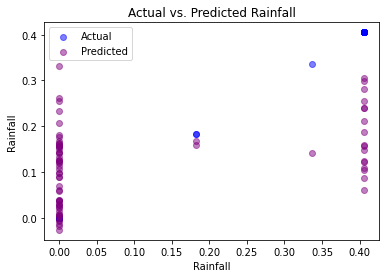

In [20]:
rainfall_features = ['MinTemp', 'MaxTemp', 'Sunshine', 'WindGustSpeed', 'Humidity3pm']

# Select the new dependent variable (target)
rainfall_target = 'Rainfall'

# Split the dataset into training and testing sets for the new target
X_train_rainfall, X_test_rainfall, y_train_rainfall, y_test_rainfall = train_test_split(weather_data[rainfall_features], weather_data[rainfall_target], test_size=0.2, random_state=42)

# Initialize a new linear regression model
model_rainfall = LinearRegression()

# Fit the model on the training data for the new target
model_rainfall.fit(X_train_rainfall, y_train_rainfall)

# Make predictions on the test set for the new target
y_pred_rainfall = model_rainfall.predict(X_test_rainfall)

# Evaluate the performance of the new model
mse_rainfall = mean_squared_error(y_test_rainfall, y_pred_rainfall)
print(f'Mean Squared Error for {rainfall_target}: {mse_rainfall}')

# Plot the actual vs. predicted values for the new target with different colors
plt.scatter(y_test_rainfall, y_test_rainfall, c='blue', label='Actual', alpha=0.5)
plt.scatter(y_test_rainfall, y_pred_rainfall, c='purple', label='Predicted', alpha=0.5)  # Use a different color for the new target
plt.xlabel(rainfall_target)
plt.ylabel(rainfall_target)
plt.title(f"Actual vs. Predicted {rainfall_target}")
plt.legend()
plt.show()